### Detecting & Handling Imbalanced Data: Visualizing Class Imbalance
**Question**: Load the Credit Card Fraud Detection dataset and visualize the class imbalance. Then apply random undersampling to balance it.

test_load_data_invalid_file (__main__.TestImbalanceHandling) ... ok
test_random_undersample_balances_classes (__main__.TestImbalanceHandling) ... ok
test_visualize_class_imbalance (__main__.TestImbalanceHandling) ... 

Error: File not found at creditcard.csv

Running Unit Tests...

Error: File not found at non_existent.csv


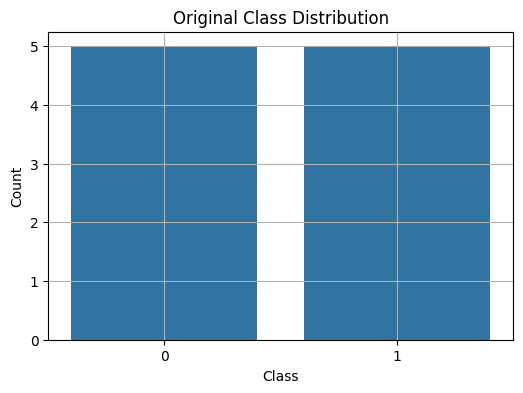

ok

----------------------------------------------------------------------
Ran 3 tests in 0.131s

OK


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
import seaborn as sns
import os
import unittest

# Step 1: Load Data
def load_data(filepath):
    """
    Loads the dataset from the given filepath.
    Returns a DataFrame or raises FileNotFoundError.
    """
    try:
        df = pd.read_csv(filepath)
        if df.empty:
            raise ValueError("The dataset is empty.")
        return df
    except FileNotFoundError:
        print(f"Error: File not found at {filepath}")
        return pd.DataFrame()
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return pd.DataFrame()


# Step 2: Visualize Original Class Imbalance
def visualize_class_imbalance(df, class_column='Class', title='Original Class Distribution'):
    """
    Plots the class distribution.
    """
    try:
        plt.figure(figsize=(6,4))
        sns.countplot(data=df, x=class_column)
        plt.title(title)
        plt.xlabel('Class')
        plt.ylabel('Count')
        plt.grid(True)
        plt.show()
    except Exception as e:
        print(f"Error visualizing class imbalance: {e}")


# Step 3: Apply Random Undersampling
def random_undersample(df, class_column='Class'):
    """
    Performs random undersampling to balance classes.
    Returns a balanced DataFrame.
    """
    try:
        majority = df[df[class_column] == 0]
        minority = df[df[class_column] == 1]

        majority_downsampled = resample(majority,
                                        replace=False,
                                        n_samples=len(minority),
                                        random_state=42)

        balanced_df = pd.concat([majority_downsampled, minority])
        return balanced_df
    except Exception as e:
        print(f"Error during undersampling: {e}")
        return pd.DataFrame()


# Step 4: Visualize Balanced Data
def visualize_balanced_class_imbalance(df, class_column='Class', title='Balanced Class Distribution'):
    """
    Visualizes the class distribution after balancing.
    """
    visualize_class_imbalance(df, class_column=class_column, title=title)


# Step 5: Run All Steps
def main():
    path = 'creditcard.csv'  # Adjust path if needed
    df = load_data(path)

    if df.empty:
        return

    print("Original Class Distribution:")
    visualize_class_imbalance(df)

    balanced_df = random_undersample(df)

    if not balanced_df.empty:
        print("Balanced Class Distribution:")
        visualize_balanced_class_imbalance(balanced_df)


# Step 6: Unit Tests
class TestImbalanceHandling(unittest.TestCase):

    def setUp(self):
        self.sample_df = pd.DataFrame({
            'Feature1': range(10),
            'Class': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
        })

    def test_random_undersample_balances_classes(self):
        balanced = random_undersample(self.sample_df)
        class_counts = balanced['Class'].value_counts().to_dict()
        self.assertEqual(class_counts[0], class_counts[1])

    def test_load_data_invalid_file(self):
        df = load_data("non_existent.csv")
        self.assertTrue(df.empty)

    def test_visualize_class_imbalance(self):
        # This just checks no exception is raised (visual test)
        try:
            visualize_class_imbalance(self.sample_df)
        except Exception:
            self.fail("visualize_class_imbalance() raised Exception unexpectedly!")

if __name__ == "__main__":
    main()

    # Run tests
    print("\nRunning Unit Tests...\n")
    unittest.main(argv=[''], verbosity=2, exit=False)
